In [2]:
import os
import matplotlib.pyplot as plt
from tqdm import tqdm 
import cv2


In [60]:
borderline_negative_negative = os.listdir('data/borderline_negative/negative')
borderline_negative_negative = [x for x in borderline_negative_negative if x.endswith('.jpg')]
borderline_negative_negative = [os.path.join('data/borderline_negative/negative', x) for x in borderline_negative_negative]

borderline_negative_positive = os.listdir('data/borderline_negative/positive')
borderline_negative_positive = [x for x in borderline_negative_positive if x.endswith('.jpg')]
borderline_negative_positive = [os.path.join('data/borderline_negative/positive', x) for x in borderline_negative_positive]




In [61]:
# load one image for example
img = cv2.imread(borderline_negative_negative[13])

# create smaller images 224x224 in a grid from the original image
# and save them to a list
small_images = []
for i in range(0, img.shape[0], 224):
    row = []
    for j in range(0, img.shape[1], 224):
        row.append(img[i:i+224, j:j+224])
    small_images.append(row)


In [62]:
# display 196 created images in a grid
def show_grid(small_images):
    width = len(small_images[0])
    height = len(small_images)
    fig, axs = plt.subplots(height, width, figsize=(12, 12))
    for i in range(height):
        for j in range(width):
            axs[i, j].imshow(small_images[i][j])
            axs[i, j].axis('off')


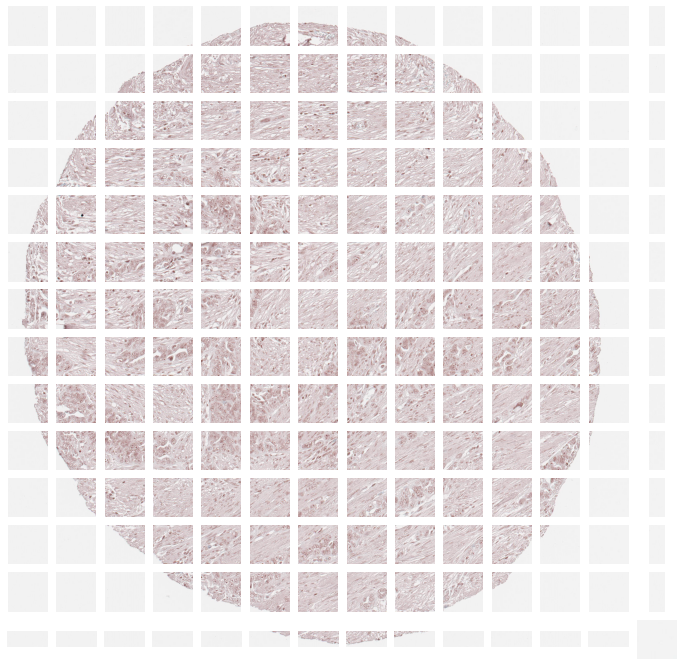

In [63]:
show_grid(small_images)

In [5]:
def extract_middle_images(images):
    width = len(images[0])
    height = len(images)
    number_horizontal = width // 2
    number_vertical = height // 2

    left_start = width // 4
    top_start = height // 4
    middle_images = []
    for i in range(top_start, top_start + number_vertical):
        row = []
        for j in range(left_start, left_start + number_horizontal):
            row.append(images[i][j])
        middle_images.append(row)
    return middle_images



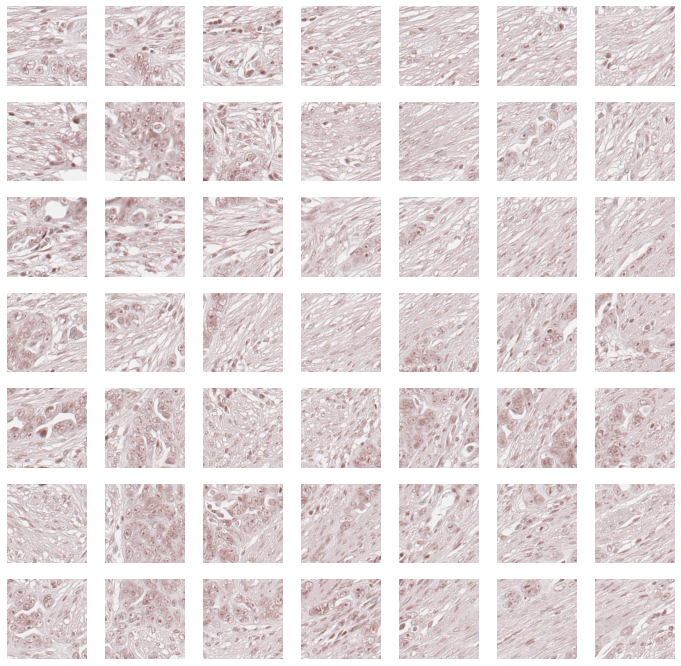

In [71]:
middle = extract_middle_images(small_images)
show_grid(middle)

In [6]:
def preprocess_folder(folder_path, output_folder):
    # use tqdm to show progress bar
    os.makedirs(output_folder, exist_ok=True)
    for image_path in tqdm(os.listdir(folder_path)):
        image = cv2.imread(os.path.join(folder_path, image_path))
        small_images = []
        for i in range(0, image.shape[0], 224):
            row = []
            for j in range(0, image.shape[1], 224):
                row.append(image[i:i+224, j:j+224])
            small_images.append(row)
        middle = extract_middle_images(small_images)
        for i in range(len(middle)):
            for j in range(len(middle[0])):
                cv2.imwrite(os.path.join(output_folder, f'{image_path}_{i}_{j}.jpg'), middle[i][j])


In [7]:
preprocess_folder('data/borderline_negative/negative', 'data/preprocessed/negative')

100%|██████████| 1198/1198 [03:29<00:00,  5.73it/s]


In [8]:
preprocess_folder('data/borderline_negative/positive', 'data/preprocessed/positive')

100%|██████████| 1817/1817 [05:33<00:00,  5.45it/s]
